특성 이름: ['petal length (cm)', 'petal width (cm)']
타깃 이름: ['setosa', 'versicolor']
데이터 크기: (100, 2)
지원 벡터(Support Vectors):
[[1.9 0.4]
 [3.  1.1]]


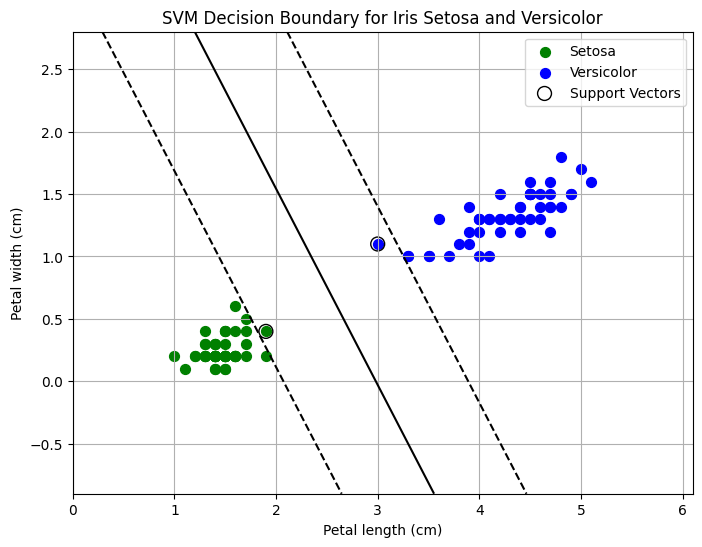

In [3]:
# 필요한 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# 1. 데이터 준비
# Iris 데이터셋 로드
iris = datasets.load_iris()
X = iris.data[:, 2:4]  # 꽃잎 길이(petal length)와 너비(petal width)
y = iris.target

# Iris Setosa(0)와 Versicolor(1) 클래스만 선택
setosa_versicolor_mask = y < 2
X = X[setosa_versicolor_mask]
y = y[setosa_versicolor_mask]

# 데이터 확인
print("특성 이름:", ['petal length (cm)', 'petal width (cm)'])
print("타깃 이름:", ['setosa', 'versicolor'])
print("데이터 크기:", X.shape)

# 2. 모델 학습
# 선형 SVM 모델 정의
model = SVC(kernel="linear")

# 모델 학습
model.fit(X, y)

# 지원 벡터 출력
print("지원 벡터(Support Vectors):")
print(model.support_vectors_)

# 3. 결정 경계 시각화
# 결정 경계를 시각화하기 위한 격자 생성
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# 모델의 결정 함수 값 계산
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 데이터 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], color='green', label='Setosa', s=50)
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], color='blue', label='Versicolor', s=50)

# 결정 경계와 마진 플롯
plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='black')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='black', label='Support Vectors')

# 그래프 설정
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('SVM Decision Boundary for Iris Setosa and Versicolor')
plt.legend()
plt.grid()
plt.show()
